In [74]:
import dask.dataframe as dd
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
from dask.distributed import Client

client = Client(dashboard_address='0.0.0.0:6784')
client

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP st

Client Scheduler: tcp://127.0.0.1:53368 Dashboard: http://127.0.0.1:6784/status,Cluster Workers: 4 Cores: 8 Memory: 17.06 GB


distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


In [54]:
df = dd.read_csv('user_data_all/*.csv')
df = df.rename(columns = {'0': 'entities'})
df['evaluated_entities'] = df.apply(lambda x: eval(x['entities']), axis=1, meta=list)
del df['entities']
df['entity_count'] = df['evaluated_entities'].apply(lambda x: len(x), meta=int)
df

,user_name,evaluated_entities,entity_count
npartitions=1411,,,
,object,object,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [6]:
df.head()

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


,user_name,evaluated_entities,count
0,11leets,"[{'hashtags': [], 'urls': [], 'user_mentions':...",1
1,1380KCIM,"[{'hashtags': [], 'urls': [{'url': 'https://t....",1
2,157Ram,"[{'hashtags': [], 'urls': [], 'user_mentions':...",1
3,15Catboy,"[{'hashtags': [], 'urls': [{'url': 'https://t....",1
4,1776_NOAH_711,"[{'hashtags': [], 'urls': [], 'user_mentions':...",2


In [7]:
ds = df.groupby('entity_count').count().compute()
ds.sort_index(inplace=True)
ds

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


,user_name,evaluated_entities
count,,
1,1227124,1227124
2,184124,184124
3,53680,53680
4,21044,21044
5,9671,9671
6,4820,4820
7,2711,2711
8,1431,1431
10,540,540


<AxesSubplot:xlabel='count'>

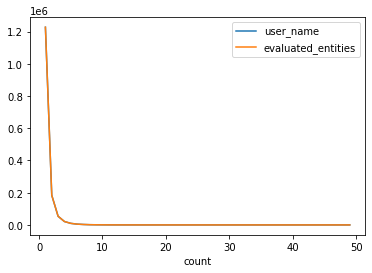

In [23]:
ds.plot()

In [55]:
def get_hashtags(x):
    l = []
    for i in x[1]:
        if 'hashtags' in i:
            for j in i['hashtags']:
                l.append(j['text'])
    return l

def get_user_mentions(x):
    l = []
    for i in x[1]:
        if 'user_mentions' in i:
            for j in i['user_mentions']:
                l.append(j['screen_name'])
    return l

def get_url(x):
    l = []
    for i in x[1]:
        if 'urls' in i:
            for j in i['urls']:
                l.append(j['url'])
    return l

df['hashtags'] = df.apply(lambda x: get_hashtags(x), axis=1, meta=list)
df['user_mentions'] = df.apply(lambda x: get_user_mentions(x), axis=1, meta=list)
df['url'] = df.apply(lambda x: get_url(x), axis=1, meta=list)
df

,user_name,evaluated_entities,entity_count,hashtags,user_mentions,url
npartitions=1411,,,,,,
,object,object,int64,object,object,object
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [56]:
df['hashtags_count'] = df.apply(lambda x: len(x['hashtags']), axis=1, meta=int)
df['user_mentions_count'] = df.apply(lambda x: len(x['user_mentions']), axis=1, meta=int)
df['url_count'] = df.apply(lambda x: len(x['url']), axis=1, meta=int)
df

,user_name,evaluated_entities,entity_count,hashtags,user_mentions,url,hashtags_count,user_mentions_count,url_count
npartitions=1411,,,,,,,,,
,object,object,int64,object,object,object,int64,int64,int64
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [60]:
ds_hashtags = df.groupby('hashtags_count').count().compute()
ds_hashtags

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


,user_name,evaluated_entities,entity_count,hashtags,user_mentions,url,user_mentions_count,url_count
hashtags_count,,,,,,,,
0,1322648,1322648,1322648,1322648,1322648,1322648,1322648,1322648
1,107991,107991,107991,107991,107991,107991,107991,107991
2,34067,34067,34067,34067,34067,34067,34067,34067
3,18867,18867,18867,18867,18867,18867,18867,18867
4,8222,8222,8222,8222,8222,8222,8222,8222
5,8357,8357,8357,8357,8357,8357,8357,8357
6,2296,2296,2296,2296,2296,2296,2296,2296
7,1581,1581,1581,1581,1581,1581,1581,1581
9,548,548,548,548,548,548,548,548


In [61]:
del df['evaluated_entities']
del df['entity_count']
del df['hashtags_count']
del df['user_mentions_count']
del df['url_count']

In [63]:
df.to_csv('user_data_entity_splitup/*.csv')

['/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0000.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0001.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0002.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0003.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0004.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0005.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0006.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0007.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0008.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0009.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0010.csv',
 '/mnt/c/Users/aliab/Documents/SMPA_notebooks/user_data_entity_splitup/0011.csv',
 '/mnt/c/Users/a

In [64]:
df.shape[0].compute()

1506977

In [66]:
hashtags = df['hashtags'].compute()
hashtags

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


0          []
1          []
2          []
3          []
4          []
        ...  
1038       []
1039       []
1040       []
1041       []
1042    [BLM]
Name: hashtags, Length: 1506977, dtype: object

In [68]:
hashtags = hashtags.to_list()
hashtags[:10]

[[], [], [], [], [], [], [], [], [], []]

In [69]:
flat_list = []
for sublist in tqdm(hashtags):
    for item in sublist:
        flat_list.append(item)

  0%|          | 0/1506977 [00:00<?, ?it/s]

In [73]:
all_hashtags = set(flat_list)
len(all_hashtags)

66062

In [78]:
list(all_hashtags)[:10]

['YFM',
 'cinnamonroll',
 'Minnea',
 'cuckolding',
 'ทุกคนรู้',
 'sweatybetty',
 'JusticeForGeorgeFlloyd',
 'AlishaWalker',
 'CopRioters',
 'CummingMustGo']

In [77]:
pd.Series(list(all_hashtags)).to_csv('all_hashtags.csv')